Imports

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime
import pickle as pickle
from sklearn.preprocessing import MinMaxScaler

c:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Saving all relevant file paths into a dictionary to be used in loops

In [3]:
folder_names = ['S{}'.format(i) for i in range(2, 18)]  # S2, S3, ..., S17

# List files in each folder and find the file path of S{X}.pkl
file_paths = {}
for folder_name in folder_names:
    file_name = folder_name + '.pkl'
    folder_path = os.path.join('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD', folder_name)  # Replace '/path/to/parent/folder' with your parent folder path
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        file_paths[folder_name] = file_path
        
for folder_name, file_path in file_paths.items():
    file_paths[folder_name] = file_path.replace('\\', '/')    

Looping through .pkl files, deserializing the .pkl nested dictionaries, saving data into data frames based on subject number

In [4]:
for folder_name, file_path in file_paths.items():
    # Extract the numeric part from the folder name
    folder_number = int(folder_name[1:])
    
    # Open the file
    with open(file_path, 'rb') as file:
        # Deserialize the object stored in the .pkl file
        data = pickle.load(file, encoding='latin1')
        
        # Initialize a dictionary to store dataframes
        data_frames = {}

        # Extracting chest sensor data
        chest_data = data['signal']['chest']
        for sensor, values in chest_data.items():
            data_frames['chest_{}_{}'.format(folder_number, sensor)] = pd.DataFrame(values)

        # Extracting wrist sensor data
        wrist_data = data['signal']['wrist']
        for sensor, values in wrist_data.items():
            data_frames['wrist_{}_{}'.format(folder_number, sensor)] = pd.DataFrame(values)

        # Creating a dataframe for labels
        labels = pd.DataFrame(data['label'], columns=['label'])
        data_frames['labels_{}'.format(folder_number)] = labels

        # Assigning each dataframe to a variable with its name derived from the dictionary entry
        for key, df in data_frames.items():
            globals()[key] = df

Formatting data and combining into data frames for each subject

In [5]:
for subject_number in range(2, 18):
    
    if subject_number == 12:
        continue  # Skip subject 12
    
    # Generate data frame names based on the subject number
    labels_name = 'labels_{}'.format(subject_number)
    wrist_EDA_name = 'wrist_{}_EDA'.format(subject_number)
    wrist_BVP_name = 'wrist_{}_BVP'.format(subject_number)
    
    # Perform operations for the current subject
    downsampled_labels = globals()[labels_name].iloc[::700]
    downsampled_labels.reset_index(drop=True, inplace=True)
    
    df_repeated = pd.DataFrame(np.repeat(downsampled_labels.values, 64, axis=0), columns=downsampled_labels.columns)
    df_repeated.reset_index(drop=True, inplace=True)
    
    df_repeated[(df_repeated == 5) | (df_repeated == 6) | (df_repeated == 7)] = 0
    
    wrist_EDA = pd.DataFrame(np.repeat(globals()[wrist_EDA_name].values, 16, axis=0), columns=globals()[wrist_EDA_name].columns)
    wrist_EDA.reset_index(drop=True, inplace=True)
    wrist_EDA = wrist_EDA.rename(columns={wrist_EDA.columns[0]: 'EDA'})
    
    wrist_BVP = globals()[wrist_BVP_name].rename(columns={globals()[wrist_BVP_name].columns[0]: 'BVP'})
    
    # Concatenate data frames
    globals()['S{}_data'.format(subject_number)] = pd.concat([df_repeated, wrist_EDA, wrist_BVP], axis=1)

Now loading the heart rate data and syncing it with the rest of the data

In [6]:
S2_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S2/S2_E4_Data/HR.csv')
S2_HR_select = S2_HR[2:6081]
S2_HR_repeated = S2_HR_select.loc[S2_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S2_HR_repeated.columns[0]
S2_HR_repeated = S2_HR_repeated.rename(columns={first_column_name: 'HR'})

In [7]:
S3_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S3/S3_E4_Data/HR.csv')
S3_HR_select = S3_HR[722:7215]
S3_HR_repeated = S3_HR_select.loc[S3_HR_select.index.repeat(64)].reset_index(drop=True)
first_column_name = S3_HR_repeated.columns[0]
S3_HR_repeated = S3_HR_repeated.rename(columns={first_column_name: 'HR'})

In [8]:
S4_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S4/S4_E4_Data/HR.csv')
S4_HR_select = S4_HR[1068:7491]
S4_HR_repeated = S4_HR_select.loc[S4_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S4_HR_repeated.columns[0]
S4_HR_repeated = S4_HR_repeated.rename(columns={first_column_name: 'HR'})

In [9]:
S5_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S5/S5_E4_Data/HR.csv')
S5_HR_select = S5_HR[1084:7342]
S5_HR_repeated = S5_HR_select.loc[S5_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S5_HR_repeated.columns[0]
S5_HR_repeated = S5_HR_repeated.rename(columns={first_column_name: 'HR'})

In [10]:
S6_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S6/S6_E4_Data/HR.csv')
S6_HR_select = S6_HR[1244:8315]
S6_HR_repeated = S6_HR_select.loc[S6_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S6_HR_repeated.columns[0]
S6_HR_repeated = S6_HR_repeated.rename(columns={first_column_name: 'HR'})

In [11]:
S7_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S7/S7_E4_Data/HR.csv')
S7_HR_select = S7_HR[852:6090]
S7_HR_repeated = S7_HR_select.loc[S7_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S7_HR_repeated.columns[0]
S7_HR_repeated = S7_HR_repeated.rename(columns={first_column_name: 'HR'})

In [12]:
S8_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S8/S8_E4_Data/HR.csv')
S8_HR_select = S8_HR[982:6448]
S8_HR_repeated = S8_HR_select.loc[S8_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S8_HR_repeated.columns[0]
S8_HR_repeated = S8_HR_repeated.rename(columns={first_column_name: 'HR'})

In [13]:
S9_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S9/S9_E4_Data/HR.csv')
S9_HR_select = S9_HR[2:5225]
S9_HR_repeated = S9_HR_select.loc[S9_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S9_HR_repeated.columns[0]
S9_HR_repeated = S9_HR_repeated.rename(columns={first_column_name: 'HR'})

In [14]:
S10_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S10/S10_E4_Data/HR.csv')
S10_HR_select = S10_HR[759:6255]
S10_HR_repeated = S10_HR_select.loc[S10_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S10_HR_repeated.columns[0]
S10_HR_repeated = S10_HR_repeated.rename(columns={first_column_name: 'HR'})

In [15]:
S11_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S11/S11_E4_Data/HR.csv')
S11_HR_select = S11_HR[619:5852]
S11_HR_repeated = S11_HR_select.loc[S11_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S11_HR_repeated.columns[0]
S11_HR_repeated = S11_HR_repeated.rename(columns={first_column_name: 'HR'})

In [16]:
S13_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S13/S13_E4_Data/HR.csv')
S13_HR_select = S13_HR[917:6454]
S13_HR_repeated = S13_HR_select.loc[S13_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S13_HR_repeated.columns[0]
S13_HR_repeated = S13_HR_repeated.rename(columns={first_column_name: 'HR'})

In [17]:
S14_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S14/S14_E4_Data/HR.csv')
S14_HR_select = S14_HR[730:6278]
S14_HR_repeated = S14_HR_select.loc[S14_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S14_HR_repeated.columns[0]
S14_HR_repeated = S14_HR_repeated.rename(columns={first_column_name: 'HR'})

In [18]:
S15_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S15/S15_E4_Data/HR.csv')
S15_HR_select = S15_HR[951:6203]
S15_HR_repeated = S15_HR_select.loc[S15_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S15_HR_repeated.columns[0]
S15_HR_repeated = S15_HR_repeated.rename(columns={first_column_name: 'HR'})

In [19]:
S16_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S16/S16_E4_Data/HR.csv')
S16_HR_select = S16_HR[1168:6799]
S16_HR_repeated = S16_HR_select.loc[S16_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S16_HR_repeated.columns[0]
S16_HR_repeated = S16_HR_repeated.rename(columns={first_column_name: 'HR'})

In [20]:
S17_HR = pd.read_csv('C:/Users/User/VSCodeFiles/Projects/499/WESAD/WESAD/S17/S17_E4_Data/HR.csv')
S17_HR_select = S17_HR[1003:6923]
S17_HR_repeated = S17_HR_select.loc[S17_HR_select.index.repeat(64)].reset_index(drop=True)

first_column_name = S17_HR_repeated.columns[0]
S17_HR_repeated = S17_HR_repeated.rename(columns={first_column_name: 'HR'})

Joining the heart rate data to the rest of the subject data

In [21]:
for i in range(2, 18):
    if i != 12:
        df_name = f"S{i}_data"
        hr_name = f"S{i}_HR_repeated"
        
        # Assuming you have already defined your data frames
        df = globals()[df_name]
        hr_df = globals()[hr_name]
        
        # Add the HR column from hr_df to df
        df['HR'] = hr_df['HR']

In [22]:
for i in range(2, 18):
    if i != 12:
        df_name = f"S{i}_data"
        
        # Assuming you have already defined your data frame
        df = globals()[df_name]
        
        # Calculate HRV for each instance in time for the current data frame
        window_size = 640  # 10 second interval
        hrv_values = []

        for j in range(len(df)):
            start_index = max(0, j - window_size)
            end_index = min(len(df), j + window_size)

            # Calculate HRV for the current instance in time
            hrv = df.iloc[start_index:end_index]['HR'].std()
            hrv_values.append(hrv)

        # Add HRV values as a new column to the current DataFrame
        df['HRV'] = hrv_values

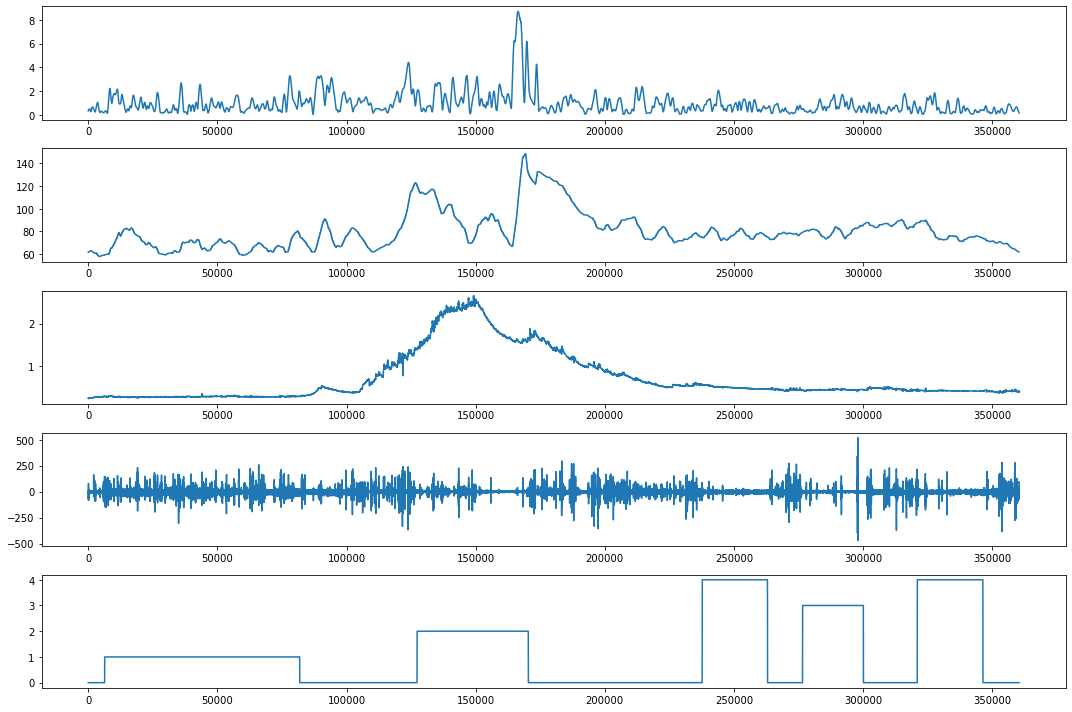

In [23]:
fig, axs = plt.subplots(5, 1, figsize=(15, 10))  # 2 rows, 1 column

# Plot the first DataFrame
S16_data['HRV'].plot(ax=axs[0])  # Plot on the first subplot (top)

# Plot the second DataFrame
S16_data['HR'].plot(ax=axs[1])  

S16_data['EDA'].plot(ax=axs[2]) 

S16_data['BVP'].plot(ax=axs[3])  

S16_data['label'].plot(ax=axs[4])  

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [24]:
S16_data.to_csv('S16_data.csv', index=False)  # Specify index=False to avoid saving the index

Data formatted: moving on to making a predictive model
Goal: Predicting a stress event
Going to start by isolating stress events and therefore models will be binary classifiers. Might try changing that in the future depending on model accuracy

In [25]:
for i in range(2, 18):
    if i == 12:
        continue  # Skip data frame 12
    df_name = f'S{i}_data'  # Assuming your data frame names follow the pattern 'S{i}_data'
    
    # Check if the data frame exists
    if df_name in locals():
        df = locals()[df_name]  # Get the data frame
        if 'EDA' in df.columns:
            # Normalize the 'EDA' column using MinMaxScaler
            scaler = MinMaxScaler()
            df['EDA'] = scaler.fit_transform(df['EDA'].values.reshape(-1, 1))

            # Update the data frame in the local namespace
            locals()[df_name] = df

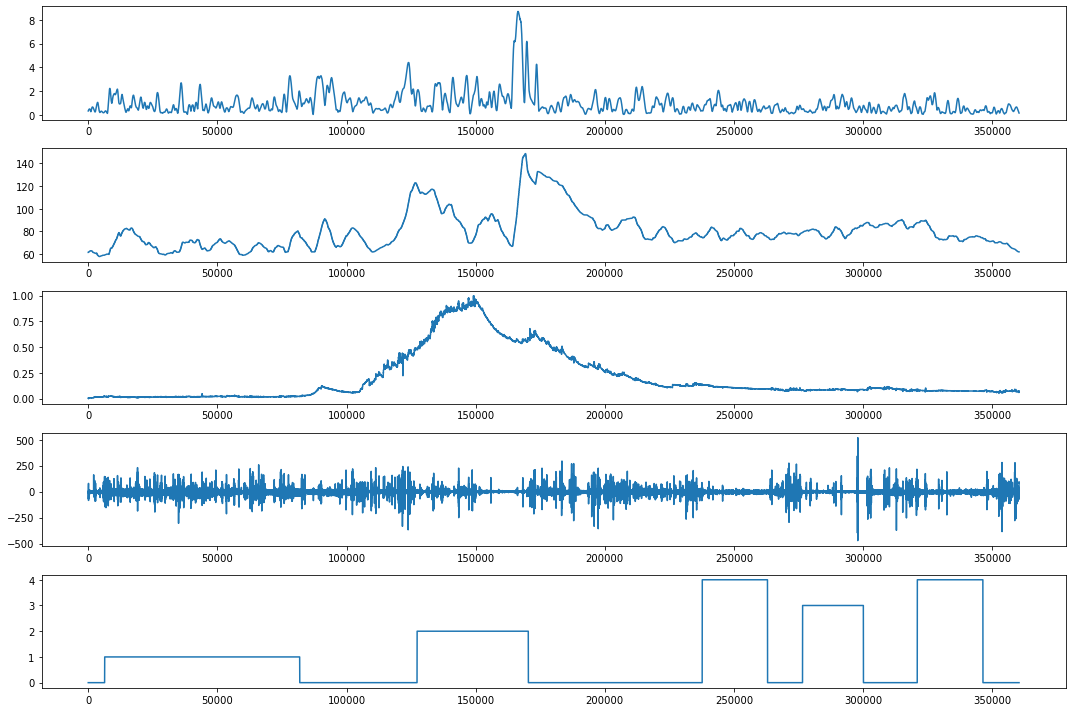

In [26]:
fig, axs = plt.subplots(5, 1, figsize=(15, 10))  # 2 rows, 1 column

# Plot the first DataFrame
S16_data['HRV'].plot(ax=axs[0])  # Plot on the first subplot (top)

# Plot the second DataFrame
S16_data['HR'].plot(ax=axs[1])  

S16_data['EDA'].plot(ax=axs[2]) 

S16_data['BVP'].plot(ax=axs[3])  

S16_data['label'].plot(ax=axs[4])  

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [27]:
X = pd.concat([S2_data, S3_data,S5_data, S6_data, S8_data,  S9_data, S10_data, S11_data, S14_data, S17_data],ignore_index=True)
X_test = pd.concat([S16_data, S7_data, S13_data, S15_data, S4_data],ignore_index=True)
X_ver = pd.concat([S16_data, S17_data],ignore_index=True)

X = X.drop(columns=['BVP','HRV','HR'])
X_test = X_test.drop(columns=['BVP','HRV','HR'])
X_ver = X_ver.drop(columns=['BVP','HRV','HR'])

X1_train = X.drop(columns='label')
y1_train = X.label
y1_train = y1_train.replace({1: 0, 3: 0, 4: 0, 2: 1})

X1_test = X_test.drop(columns='label')
y1_test = X_test.label
y1_test = y1_test.replace({1: 0, 3: 0, 4: 0, 2: 1})

X1_ver = X_ver.drop(columns='label')
y1_ver = X_ver.label
y1_ver = y1_ver.replace({1: 0, 3: 0, 4: 0, 2: 1})

In [28]:
S7_data.to_csv('S7_data.csv', index=False)  # Specify index=False to avoid saving the index
S13_data.to_csv('S13_data.csv', index=False)  # Specify index=False to avoid saving the index
S15_data.to_csv('S15_data.csv', index=False)  # Specify index=False to avoid saving the index
S4_data.to_csv('S4_data.csv', index=False)  # Specify index=False to avoid saving the index
S5_data.to_csv('S5_data.csv', index=False)  # Specify index=False to avoid saving the index
X_test.to_csv('X_test.csv', index=False)  # Specify index=False to avoid saving the index

Model creation: Optimizing for recall

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, make_scorer, recall_score, f1_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Define recall as the scoring metric
logistic = LogisticRegression(C=1.0, penalty='l2',solver='saga')

# Train the logistic regression model on the training data
logistic.fit(X1_train, y1_train)

# Make predictions on the test data
y_pred_lr = logistic.predict(X1_test)

# Evaluate the model
print(classification_report(y1_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y1_test, y_pred_lr)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_lr)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97   1586112
           1       0.77      0.68      0.72    211072

    accuracy                           0.94   1797184
   macro avg       0.86      0.83      0.84   1797184
weighted avg       0.94      0.94      0.94   1797184

Confusion Matrix:
[[1542896   43216]
 [  67056  144016]]


In [31]:
feature_importance = abs(logistic.coef_[0])
most_influential_feature_index = np.argmax(feature_importance)
most_influential_feature = X1_train.columns[most_influential_feature_index]
print("Most influential feature:", most_influential_feature)

Most influential feature: EDA


In [54]:
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1,
                                        max_features='auto', class_weight=None)

# Train the Random Forest model on the training data
rf_classifier.fit(X1_train, y1_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X1_test)

# Print classification report
print("Classification Report:")
print(classification_report(y1_test, y_pred_rf))

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y1_test, y_pred_rf)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_rf)

c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92   1586112
           1       0.41      0.42      0.41    211072

    accuracy                           0.86   1797184
   macro avg       0.67      0.67      0.67   1797184
weighted avg       0.86      0.86      0.86   1797184

Confusion Matrix:
[[1457872  128240]
 [ 122368   88704]]


In [33]:
feature_importance = rf_classifier.feature_importances_
most_influential_feature_index = np.argmax(feature_importance)
most_influential_feature = X1_train.columns[most_influential_feature_index]
print("Most influential feature:", most_influential_feature)


Most influential feature: EDA


In [34]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', 
                                   learning_rate=0.1, 
                                   max_depth=3, 
                                   n_estimators=100,
                                   reg_alpha=0.1,
                                   reg_lambda=0.1,
                                   gamma=0.1,
                                   subsample=0.8,
                                   colsample_bytree=0.8)

# Train the XGBoost model on the training data
xgb_classifier.fit(X1_train, y1_train)

# Make predictions on the test data
y_pred_xgb = xgb_classifier.predict(X1_test)

# Print classification report
print("Classification Report:")
print(classification_report(y1_test, y_pred_xgb))

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y1_test, y_pred_xgb)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_xgb)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96   1586112
           1       0.85      0.39      0.54    211072

    accuracy                           0.92   1797184
   macro avg       0.89      0.69      0.75   1797184
weighted avg       0.92      0.92      0.91   1797184

Confusion Matrix:
[[1571728   14384]
 [ 128096   82976]]


In [35]:
# Assuming 'xgb_classifier' is your trained XGBoost classifier
feature_importance = xgb_classifier.feature_importances_
most_influential_feature_index = np.argmax(feature_importance)
most_influential_feature = X1_train.columns[most_influential_feature_index]
print("Most influential feature:", most_influential_feature)


Most influential feature: EDA


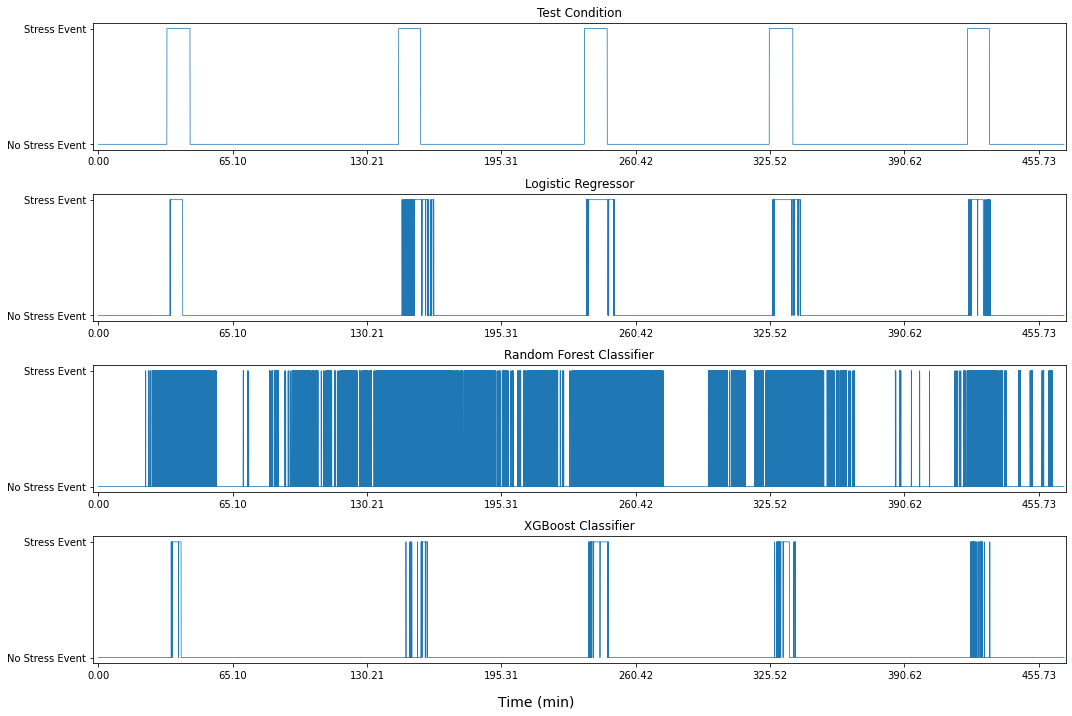

In [55]:
fig, axs = plt.subplots(4, 1, figsize=(15, 10))  # 2 rows, 1 column

# Plot the first DataFrame
y1_test.plot(ax=axs[0],linewidth=0.75)  # Plot on the first subplot (top)
axs[0].set_title('Test Condition')
tick_labels_map = {0: 'No Stress Event', 1: 'Stress Event'}
# Set y-axis ticks and labels
axs[0].set_yticks([0, 1])
axs[0].set_yticklabels([tick_labels_map.get(int(tick), '') for tick in axs[0].get_yticks()])
axs[0].legend().remove()


# Plot the second DataFrame

y_pred_df = pd.DataFrame(y_pred_lr)
y_pred_df.plot(ax=axs[1],linewidth=0.75)  
axs[1].set_title('Logistic Regressor')
# Set y-axis ticks and labels
axs[1].set_yticks([0, 1])
axs[1].set_yticklabels([tick_labels_map.get(int(tick), '') for tick in axs[1].get_yticks()])
axs[1].legend().remove()

y_pred_df = pd.DataFrame(y_pred_rf)
y_pred_df.plot(ax=axs[2],linewidth=0.75)  
axs[2].set_title('Random Forest Classifier')
# Set y-axis ticks and labels
axs[2].set_yticks([0, 1])
axs[2].set_yticklabels([tick_labels_map.get(int(tick), '') for tick in axs[1].get_yticks()])
axs[2].legend().remove()

y_pred_df = pd.DataFrame(y_pred_xgb)
y_pred_df.plot(ax=axs[3],linewidth=0.75)  
axs[3].set_title('XGBoost Classifier')
# Set y-axis ticks and labels
axs[3].set_yticks([0, 1])
axs[3].set_yticklabels([tick_labels_map.get(int(tick), '') for tick in axs[1].get_yticks()])
axs[3].legend().remove()

fig.supxlabel('Time (min)', fontsize=14)

for ax in axs:
    current_ticks = ax.get_xticks()
    new_ticks = current_ticks / 3840
    ax.set_xticks(current_ticks)
    ax.set_xticklabels([f'{tick:.2f}' for tick in new_ticks])
    
for ax in axs:
    ax.set_xlim(left=-10000, right=1800000)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [37]:
y1_test.to_csv('y1_test.csv', index=False)  # Specify index=False to avoid saving the index

In [38]:
y_pred_lr = pd.DataFrame(y_pred_lr)

In [39]:
y_pred_lr.to_csv('y_pred_lr.csv', index=False)  # Specify index=False to avoid saving the index